# AMEX Default-prediction

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('train_data.csv',nrows=10000,parse_dates=["S_2"])

df.head()

In [ ]:

df.columns.values

In [ ]:
df.info(verbose=True,null_counts=True)

In [ ]:
df.describe()

In [ ]:
df.shape

In [ ]:
df.isnull().sum().values

In [ ]:
[features for features in df.columns if df[features].isnull().sum()>0]

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df.duplicated()==False


In [ ]:
df_label = pd.read_csv('train_labels.csv',nrows=10000)
df_label.head()

In [ ]:
df_label['target'].value_counts()

In [ ]:
final_df = pd.merge(df,df_label,on='customer_ID',how='left')

In [ ]:
final_df['target'].value_counts()

In [74]:
len(final_df)

10000

In [75]:
final_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 191 columns):
 #    Column       Non-Null Count  Dtype         
---   ------       --------------  -----         
 0    customer_ID  10000 non-null  object        
 1    S_2          10000 non-null  datetime64[ns]
 2    P_2          9936 non-null   float64       
 3    D_39         10000 non-null  float64       
 4    B_1          10000 non-null  float64       
 5    B_2          10000 non-null  float64       
 6    R_1          10000 non-null  float64       
 7    S_3          8248 non-null   float64       
 8    D_41         10000 non-null  float64       
 9    B_3          10000 non-null  float64       
 10   D_42         1355 non-null   float64       
 11   D_43         6913 non-null   float64       
 12   D_44         9505 non-null   float64       
 13   B_4          10000 non-null  float64       
 14   D_45         10000 non-null  float64       
 15   B_5          10000 non-null  float6

Text(0, 0.5, 'Target')

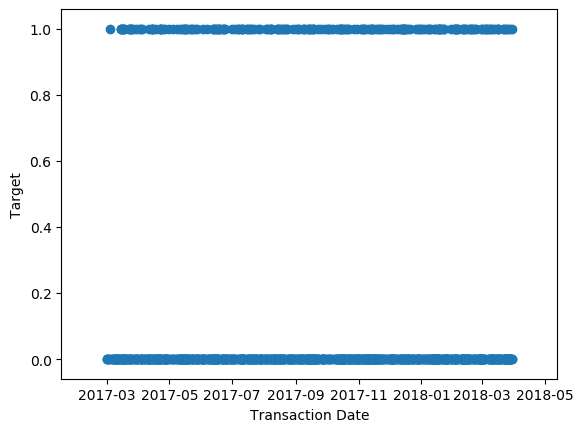

In [76]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.scatter(final_df['S_2'][:1000],final_df['target'][:1000])
plt.xlabel('Transaction Date')
plt.ylabel('Target')

In [77]:
final_df.S_2.head()

0   2017-03-09
1   2017-04-07
2   2017-05-28
3   2017-06-13
4   2017-07-16
Name: S_2, dtype: datetime64[ns]

In [78]:
final_df.columns.values

array(['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3',
       'D_41', 'B_3', 'D_42', 'D_43', 'D_44', 'B_4', 'D_45', 'B_5', 'R_2',
       'D_46', 'D_47', 'D_48', 'D_49', 'B_6', 'B_7', 'B_8', 'D_50',
       'D_51', 'B_9', 'R_3', 'D_52', 'P_3', 'B_10', 'D_53', 'S_5', 'B_11',
       'S_6', 'D_54', 'R_4', 'S_7', 'B_12', 'S_8', 'D_55', 'D_56', 'B_13',
       'R_5', 'D_58', 'S_9', 'B_14', 'D_59', 'D_60', 'D_61', 'B_15',
       'S_11', 'D_62', 'D_63', 'D_64', 'D_65', 'B_16', 'B_17', 'B_18',
       'B_19', 'D_66', 'B_20', 'D_68', 'S_12', 'R_6', 'S_13', 'B_21',
       'D_69', 'B_22', 'D_70', 'D_71', 'D_72', 'S_15', 'B_23', 'D_73',
       'P_4', 'D_74', 'D_75', 'D_76', 'B_24', 'R_7', 'D_77', 'B_25',
       'B_26', 'D_78', 'D_79', 'R_8', 'R_9', 'S_16', 'D_80', 'R_10',
       'R_11', 'B_27', 'D_81', 'D_82', 'S_17', 'R_12', 'B_28', 'R_13',
       'D_83', 'R_14', 'R_15', 'D_84', 'R_16', 'B_29', 'B_30', 'S_18',
       'D_86', 'D_87', 'R_17', 'R_18', 'D_88', 'B_31', 'S_19', 'R_19',
   

The dataset contains aggregated profile features for each customer at each statement date. Features are anonymized and normalized, and fall into the following general categories:

D_* = Delinquency variables
S_* = Spend variables
P_* = Payment variables
B_* = Balance variables
R_* = Risk variables

with the following features being categorical:

['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

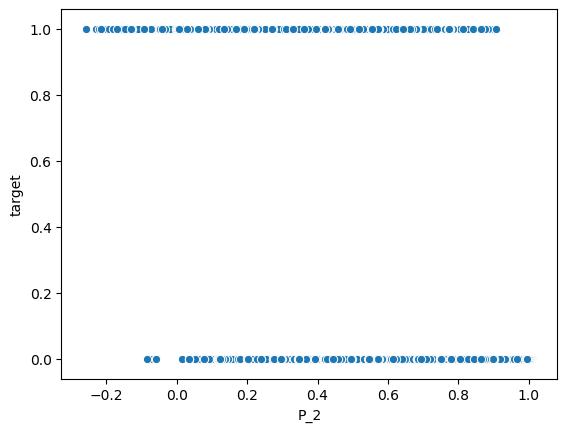

In [79]:
import seaborn as sns
sns.scatterplot(final_df['P_2'],final_df['target'])

In [80]:
final_df['B_30'].value_counts()

0.0    8411
1.0    1474
2.0     115
Name: B_30, dtype: int64

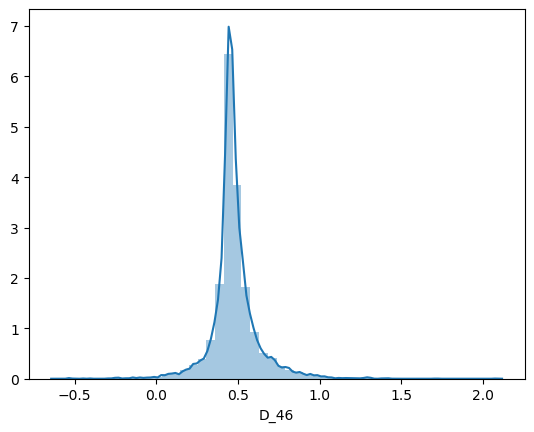

In [81]:
sns.distplot(final_df['D_46'])

In [82]:
# changing dtype of categorical features into category
categorical_features = ['B_30','B_38','D_63','D_64','D_66','D_68','D_114','D_116','D_117','D_120','D_126']
final_df[categorical_features] = final_df[categorical_features].astype('category')
final_df[categorical_features].dtypes

B_30     category
B_38     category
D_63     category
D_64     category
D_66     category
D_68     category
D_114    category
D_116    category
D_117    category
D_120    category
D_126    category
dtype: object

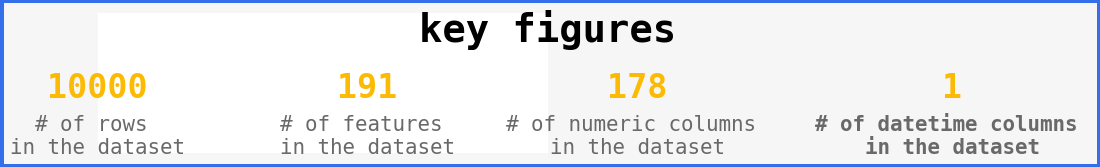

In [87]:
import matplotlib as mpl
import numpy as np
mpl.rcParams.update(mpl.rcParamsDefault) # recover matplotlib defaults after setting stylesheets

data = final_df
df_dtypes = final_df.dtypes.value_counts()


fig = plt.figure(figsize=(5,2),facecolor='white')

ax = fig.add_subplot(1,1,1)
font = 'monospace'

ax.text(1,0.8,"key figures", color="black", fontsize=28,fontweight='bold',fontfamily=font,ha='center')
ax.text(0,0.4,"{:d}".format(data.shape[0]),color='#fcba03',fontsize=24,fontweight='bold',fontfamily=font,ha='center')

ax.text(0,0.001,"# of rows \nin the dataset",color='dimgrey',fontsize=15,fontweight='light',fontfamily=font,ha='center')
ax.text(0.6,0.4,"{}".format(data.shape[1]),color="#fcba03",fontsize=24,fontweight='bold',fontfamily=font,ha='center')

ax.text(0.6,0.001,"# of features \nin the dataset",color='dimgrey',fontsize=15,fontweight='light',fontfamily=font,
        ha='center')
ax.text(1.2,0.4,'{}'.format(len(data.select_dtypes(np.number).columns)),color='#fcba03',fontsize=24,fontweight='bold',
       fontfamily=font,ha='center')
ax.text(1.2, 0.001, "# of numeric columns \nin the dataset",color='dimgrey',
        fontsize=15, fontweight='light', fontfamily=font, ha='center')

ax.text(1.9, 0.4,"{}".format(len(data.select_dtypes('datetime64[ns]').columns)), color='#fcba03', fontsize=24,
        fontweight='bold', fontfamily=font, ha='center')
ax.text(1.9,0.001,"# of datetime columns \nin the dataset", color='dimgray',fontsize=15,fontweight='bold',
        fontfamily=font,ha='center')

ax.set_yticklabels('')
ax.tick_params(axis='y',length=0)
ax.tick_params(axis='x',length=0)
ax.set_xticklabels('')

for direction in ['top','right','left','bottom']:
    ax.spines[direction].set_visible(False)
    
fig.subplots_adjust(top=0.9,bottom=0.2,left=0,hspace=1)

fig.patch.set_linewidth(5)
fig.patch.set_edgecolor('#346eeb')
fig.patch.set_facecolor('#f6f6f6')
fig.set_facecolor('#f6f6f6')

plt.show()